In [1]:
import pandas as pd
import yfinance as yahoo
import datetime as dt 
start, end = dt.date(2020,2,1), dt.date(2021,2,1)

# Get a portfolio of USA, China, England & Japan markets

In [2]:
usa = pd.read_excel('Value USA.xlsx')
china = pd.read_excel('Value China.xlsx')
england = pd.read_excel('Value England.xlsx')
japan = pd.read_excel('Value Japan.xlsx')

In [3]:
# make a list of each 
usalist = list(usa['Unnamed: 0'].values)
chinalist =  list(china['Unnamed: 0'].values)
englandlist = list(england['Unnamed: 0'].values)
japanlist = list(japan['Unnamed: 0'].values)

In [4]:
# download the currency of each market to convert them to dollar returns
currencies = ['CNYUSD=X', 'GBPUSD=X', 'JPYUSD=X']

In [5]:
# download the data needed and applied the portfolio weights

dataUsa = yahoo.download(usalist,start=start,end=end)["Adj Close"].fillna(method='ffill')
dataChina = yahoo.download(chinalist,start=start,end=end)["Adj Close"].fillna(method='ffill')
dataEngland = yahoo.download(englandlist,start=start,end=end)["Adj Close"].fillna(method='ffill')
dataJapan = yahoo.download(japanlist,start=start,end=end)["Adj Close"].fillna(method="ffill")

[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  18 of 18 completed
[*********************100%***********************]  14 of 14 completed
[*********************100%***********************]  12 of 12 completed


In [6]:
portfolioUsa = (dataUsa * usa.weights.values).T.sum()
portfolioChina = (dataChina * china.weights.values).T.sum()
portfolioEngland = (dataEngland * england.weights.values).T.sum()
portfolioJapan = (dataJapan * japan.weights.values).T.sum()

In [7]:
print(f'Return of SP500 market: {portfolioUsa.pct_change().sum()}')
print(f'Return of Shanghai market: {portfolioChina.pct_change().sum()}')
print(f'Return of FTSE market: {portfolioEngland.pct_change().sum()}')
print(f'Return of Nikkei225 market: {portfolioJapan.pct_change().sum()}')

Return of SP500 market: 1.162161548554554
Return of Shanghai market: 1.6001220656816129
Return of FTSE market: 0.5176617154851167
Return of Nikkei225 market: 0.5554465134226109


<AxesSubplot:xlabel='Date'>

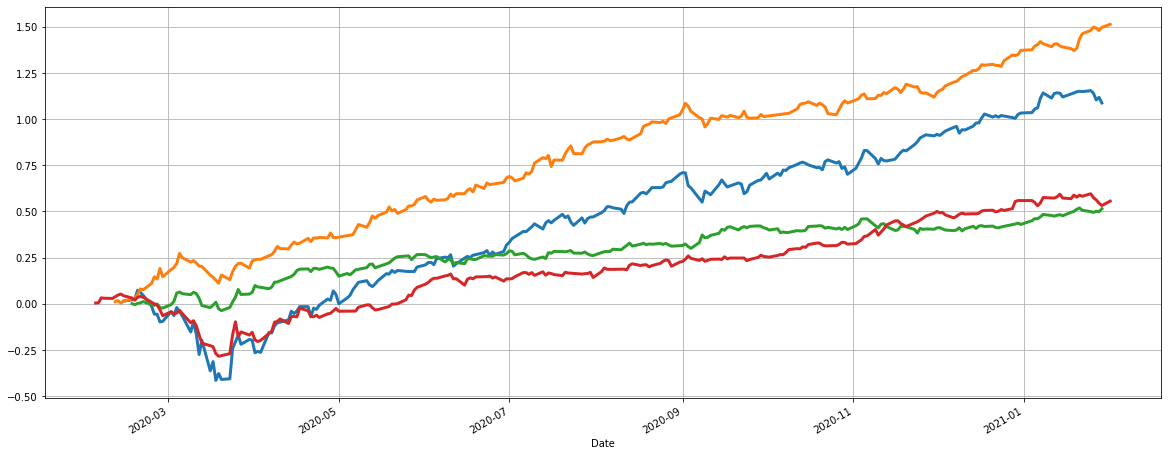

In [8]:
portfolioUsa.tail(len(portfolioJapan)).pct_change().cumsum().plot(figsize=(20,8),grid=True,lw=3.0)
portfolioChina.tail(len(portfolioJapan)).pct_change().cumsum().plot(figsize=(20,8),grid=True,lw=3.0)
portfolioEngland.tail(len(portfolioJapan)).pct_change().cumsum().plot(figsize=(20,8),grid=True,lw=3.0)
portfolioJapan.pct_change().cumsum().plot(figsize=(20,8),grid=True,lw=3.0)

## Note this returns are still in their respective currencies, they are not comparables

In [9]:
currencies = yahoo.download(currencies,start=start,end=end)["Adj Close"].fillna(method='ffill')
currencies.columns = [i.replace('=X','') for i in currencies.columns]

[*********************100%***********************]  3 of 3 completed


In [10]:
#len(portfolioUsa)
#len(portfolioChina), len(yuan)
#len(portfolioEngland), len(pound)
#len(portfolioJapan), len(yen)

# portfolio Japan is the shortest one, so rearrange to that dataframe

In [11]:
portfolioUsa = portfolioUsa.tail(len(portfolioJapan))
portfolioChina = portfolioChina.tail(len(portfolioJapan))
portfolioEngland = portfolioEngland.tail(len(portfolioJapan))

currencies = currencies.tail(len(portfolioJapan))

In [12]:
# Portfolios Converted to USD Dollars
portfolios = pd.DataFrame(portfolioUsa.pct_change().cumsum().fillna(method='ffill'),columns=['SP500 Return'])
portfolios['Shanghai Return USD'] = (currencies['CNYUSD'].pct_change().values + portfolioChina.pct_change()).cumsum().fillna(method='ffill')
portfolios['FTSE Return USD'] = (currencies['GBPUSD'].pct_change().values + portfolioEngland.pct_change()).cumsum().fillna(method='ffill')
portfolios['Nikkei Return USD'] = (currencies['JPYUSD'].pct_change().values + portfolioJapan.pct_change()).cumsum().fillna(method='ffill')

In [13]:
portfolios = portfolios.dropna()
portfolios

,SP500 Return,Shanghai Return USD,FTSE Return USD,Nikkei Return USD
Date,,,,
2020-02-18,0.023289,0.042700,-0.013000,0.074084
2020-02-19,0.072874,0.065689,-0.009457,0.089120
2020-02-20,0.061430,0.093514,-0.001821,0.074390
2020-02-21,0.045350,0.087620,0.008964,0.074444
2020-02-25,-0.056740,0.147309,0.006489,0.027632
...,...,...,...,...
2021-01-25,1.153849,1.563248,0.562699,0.660147
2021-01-26,1.139967,1.582319,0.563121,0.639644
2021-01-27,1.103696,1.579062,0.564112,0.628508


<AxesSubplot:xlabel='Date'>

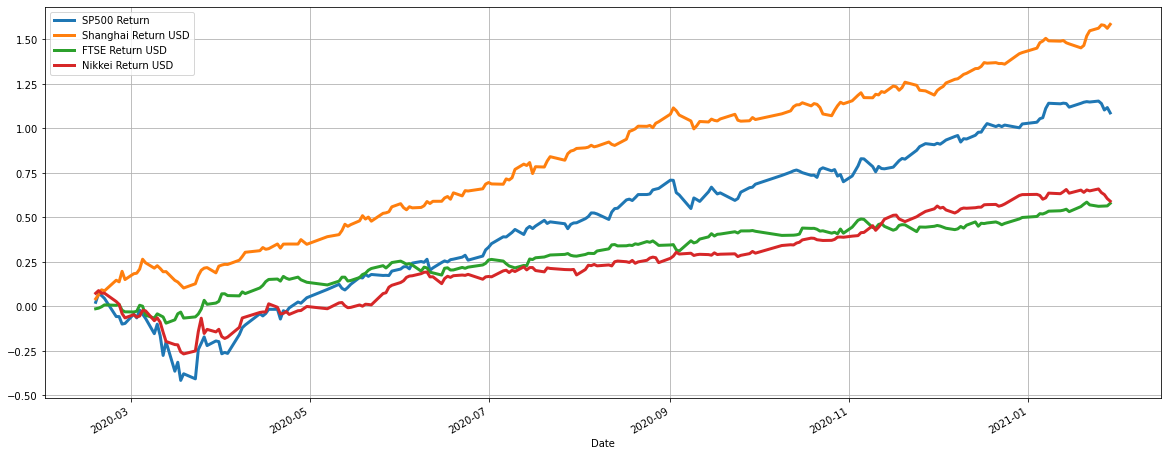

In [14]:
portfolios.plot(figsize=(20,8),grid=True,lw=3.0)